# STAT 207 Homework 9 [50 points]

## Difference Parameters and Simple Linear Regression

Due: Friday, March 31 by noon (11:59 am) CST

<hr>

**Note:** For this assignment, you may use built-in functions for performing regression, including inference.  You should not use any built-in functions for calculating confidence intervals or performing hypothesis tests for difference parameters.  

## Package Imports

Add code to the cell below to import packages needed for this assignment.

You may also need to read in additional packages later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import t
import statsmodels.api as sm
import statsmodels.formula.api as smf

## <u>Case Study 1</u>: College Volleyball （Difference in proportion）

One of your classmates posed the following question at the beginning of the semester: Is there a home court advantage for volleyball?  In this case study, we will assess whether the data supports the idea of a home court advantage for the population of all home and all away volleyball matches.

We will define our population of interest as **all women's NCAA Division 1 volleyball matches played for the season from this academic year (2022)**.

## 1. Home Court Advantage for Winning [11 points]

In our recent statistical terms, one way to formalize this question is as: is there an association between winning a match and whether the match is played at home for volleyball matches?

We will let $p_1$ represent the proportion of all home volleyball matches that are won and $p_2$ represent the proportion of all away volleyball matches that are won.

Recall our question of interest: Is there a home court advantage for volleyball?  In other words, is a team more likely to win if a match is played at home compared to if a match is played away?

**a)** Define the hypotheses for this situation.  We will assume a significance level $\alpha$ of $0.25$.

$H_0:p_1 = p_2$

$H_a: p_1 > p_2$

**b)** The following table provides sample data for women's volleyball matches, where the sample is the results of the current season for the University of Illinois women's volleyball team.

| Outcome | Home | Away |
| ------- | ---- | ---- |
| Wins    | 6    | 7    |
| Losses  | 4    | 8    |

Check the conditions that would need to be met for the standard hypothesis test procedure to be valid.

In [7]:
# Because we don't know p_1 and p_2, we will assume p_1 = p_2 = p_common
n_home = 6 + 4
n_away = 7 + 8
p_home = 6 / n_home
p_away = 7 / n_away

p_common = (6 + 7) / (n_home + n_away)
print("n_home", n_home)
print("n_away", n_away)
print("p_common", p_common)


n_home 10
n_away 15
p_common 0.52


In [11]:
n_home * p_common

5.2

In [12]:
n_home * (1 - p_common)

4.8

In [13]:
n_away * p_common

7.800000000000001

In [14]:
n_home * (1 - p_common)

4.8

Conditions: (Because we don't know p_1 and p_2, we will assume p_1 = p_2 = p_common)
1. $n_1\hat{p}$ and $n_1(1-\hat{p})$ should be at leat 10.
2. $n_2\hat{p}$ and $n_2(1-\hat{p})$ should be at leat 10.
3. Sample is randomly selected.
4. $n_1 < 10%N$
5. $n_2 < 10%N$

Check:
1. Not satisfied, accordign to calculation above.
2. Not satisfied, accordign to calculation above.
3. No, as we selected the volleyball games of UIUC as sample.
4. This is met, I searched for the total home matches.
5. This is met, I searched for the total away matches.

**c)** Are the conditions in part b met, so that the results of a hypothesis test would be valid?

1, 2, 3 are not met, and 4, 5 are met.

This will cause invalidity to our result.

**d)** Regardless of your answer in part b & c, we will perform the hypothesis test according to our standardard (or traditional) procedure.

Calculate the test statistic for this scenario.  Then, calculate the *p*-value.

In [136]:
var_1 = p_common * (1 - p_common) / n_home
var_2 = p_common * (1 - p_common) / n_away

se = np.sqrt(var_1 + var_2)
se

0.2039607805437114

In [137]:
# test statistics
test_statistics = (p_home - p_away) / se
test_statistics

0.6537204504606133

In [138]:
# p-value
p_value = 1 - norm.cdf(test_statistics)
p_value

0.25664596265164485

**e)** Based on your *p*-value, what decision is suggested by the sample data?

Our p-value is 0.2566 which is slightly larger than significance level.

Thus, according to the result of hypothesis test, we fail to reject the hypothesis, which means there is no advantage in home court.

However, since it is checked that some of the assumptions of the hypothesis test are not met. So, I think the result of this test might be invalid.

## 2. An Alternate Hypothesis Test Procedure [13 points]

Consider the results from parts b and c in Question 1.  Did they introduce any concerns about the validity of your hypothesis test procedure?

In case you did have concerns, we will consider an alternate approach that could be taken to hypothesis testing that loosens the distributional requirements.  We can use this regardless of any concerns surrounding the assumptions.

**a)** Consider the null hypothesis.  If the null hypothesis were true, what would our estimate for the common population proportion be?

In [21]:
p_common

0.52

**b)** Assuming that the null hypothesis is true, we are going to simulate the possible values for $\hat{p}_1-\hat{p}_2$.  

To do this, use the appropriate distribution to simulate the number of wins that a team might have out of the number of home matches played.  Then, use the appropriate distribution to simulate the number of wins that a team might have out of the number of away matches.  Using this new data, estimate the difference in proportions for this simulated sample.

You should then repeat this process many times, until we have repeated 800 values for the difference in sample proportions.  This is our estimated (or simulated) sampling distribution.

*Hint*: You may want to check Case Study 1 of Lab 8 for a hint about simulating a new sample from a hypothesis for parameters.

In [221]:
from scipy.stats import binom
data = []
for i in range(800):
    X1 = binom.rvs(n_home, 0.52)
    X2 = binom.rvs(n_away, 0.52)
    p1 = X1/n_home
    p2 = X2/n_away
    diff = p1 - p2
    d = {"difference" : diff}
    data.append(d)

df = pd.DataFrame(data)
df.difference.mean()


0.000708333333333337

**c)** Generate a histogram for the simulated sampling distribution.  Describe this histogram.

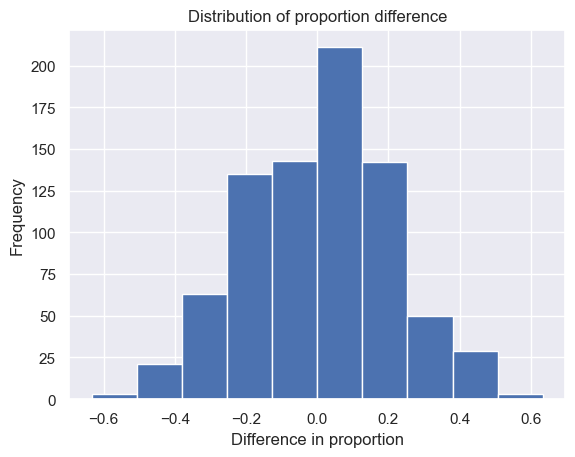

In [222]:
df.hist()
plt.title("Distribution of proportion difference")
plt.xlabel("Difference in proportion")
plt.ylabel("Frequency")
plt.show()

The distribution is unimodel and is closely normal.

**d)** From the simulated sampling distribution, obtain a *p*-value.  That is, what proportion of simulated values from our simulated sampling distribution are as extreme or more extreme than what we observed from our real sample, assuming that the null hypothesis is true?

In [223]:
p_value = len(df[df.difference > (p_home - p_away)])/800
p_value

0.22875

**e)** Based on your hypothesis test results, what **conclusion** would you make about our hypotheses at a significance level of $0.25$?

The p-value we get is 0.22875, which is larger than 0.25. We reject the null hypothesis, which means there is advantage in home court.

**f)**  Compare your *p*-values from 1e (the traditional method) and from 2d (the simulation-based method).  How similar are they?

p-value from 2d(0.22875) is less than but similar to 1e(0.254).

## 3. Volleyball Points Scored [9 points]

In Questions 1 and 2, you explored whether we have data to support a home court advantage for winning a match for NCAA D1 women's volleyball.  Can we think of the home court advantage as applying only to winning a match, or does it also affect game play on a play-by-play basis?  To answer this question, we will explore if or how home court advantage extends to the number of kills, which can be thought of as "earned points" by a volleyball team.

Our population of interest will be all NCAA Division 1 women's volleyball sets for the 2022 season.  

To answer this question, we will calculate a 99% confidence interval for the difference in population means, $\mu_1 - \mu_2$, where $\mu_1$ is defined as the population mean kills for home volleyball sets, and $\mu_2$ is defined as the population mean kills for away volleyball sets.

**a)** Read in the data in the vball.csv file included with this assignment.  

There are no missing values for our variables of interest.

Each row contains information about a set of volleyball played by Illinois for the 2022 season.  We will use the variables "Location" and "K" for our analysis.  Location records whether the set was played at an Away, Home, or Neutral location.  K records the number of kills by Illinois for that set. 

In [227]:
df = pd.read_csv("vball.csv")[["Location", "K"]]
df.shape

(109, 2)

In [229]:
df.head()

,Location,K
0,Neutral,14
1,Neutral,13
2,Neutral,9
3,Away,13
4,Away,17


In [231]:
df.Location.unique()

array(['Neutral', 'Away', 'Home'], dtype=object)

In [233]:
df_home = df[df.Location == "Home"]
df_away = df[df.Location == "Away"]

In [235]:
df_home.shape

(37, 2)

In [236]:
df_away.shape

(53, 2)

**b)** We will assume that all conditions for this confidence interval are met, and thus that the confidence interval we calculate will be valid.

Calculate by hand the 99% confidence interval for $\mu_1 - \mu_2$.

In [250]:
mu_1 = df_home.K.mean()
std_1 = df_home.K.std()
n1 = 37
mu_2 = df_away.K.mean()
std_2 = df_away.K.std()
n2 = 53
print("home:", mu_1, std_1)
print("away:", mu_2, std_2)

home: 13.027027027027026 2.9766357453273256
away: 12.830188679245284 3.5231970242108006


In [253]:
se = np.sqrt((std_1**2)/n1 + (std_2**2)/n2)
se

0.6882406448195548

In [254]:
multiplier = t.ppf(0.995, df = 36)
multiplier

2.719484630449974

In [256]:
point_estimate = mu_1 - mu_2
point_estimate

0.19683834778174258

In [259]:
lower = point_estimate - multiplier * se
upper = point_estimate + multiplier * se
print(lower, ",", upper)

-1.6748215078560162 , 2.0684982034195016


**c)** Interpret your confidence interval.  That is, put your confidence interval into words.

We are 99% confident that the difference between average kills at home matches and mean kills at away matches falls in the interval of (-1.6748215078560162, 2.0684982034195016).

<hr>

## <u>Case Study 2</u>: Real Instagram Accounts

In our next case study we would like to explore the relationship between the number of accounts that *real accounts* follow and the number of accounts that follow them. We will use the **fake_insta_cleaned.csv** dataframe for this analysis. This csv file is very similar to the fake_insta.csv file that we have been using in the past, except we have removed many of the outlier observations ahead of time.

### Installation Note

You may need to run the following command in your anaconda command prompt in order to use the **statsmodel** packages that were discussed in class.

    conda install -c conda-forge statsmodels


## 4. A First Look at Our Data [7 points] 

**a)** First, read the fake_insta_cleaned.csv file into a dataframe. Then create a dataframe that is comprised of just the real accounts.

In [260]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [266]:
df_real = pd.read_csv("fake_insta_cleaned.csv")
df_real = df_real[df_real.account_type == "real"]
df_real.shape

(54, 7)

In [267]:
df_real.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604,real
1,yes,5,64,3,35,6,real
2,yes,2,82,319,328,668,real
3,yes,1,76,6,225,356,real
4,yes,1,0,6,362,424,real


**b)** Next, create a scatterplot that visualizes the relationship between the number of followers and number of follows of real accounts in this dataset. Have this plot display a best fit line for the points as well.

<AxesSubplot: xlabel='number_of_followers', ylabel='number_of_follows'>

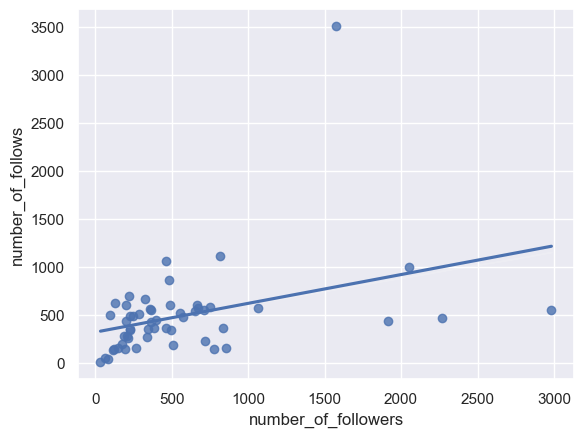

In [269]:
sns.regplot(x = 'number_of_followers', y = 'number_of_follows', data = df_real, ci = False)

**c)** Calculate the covariance and the correlation of these two numerical variables.

In [299]:
print('covariance', df_real[["number_of_follows", "number_of_followers"]].cov().iloc[0,1])

covariance 103036.0286512928


In [300]:
print('correlation', df_real[["number_of_follows", "number_of_followers"]].corr().iloc[0,1])

correlation 0.36353514994524344


## 5. Simple Linear Regression - Model Fitting [10 points]

We would like to fit a simple linear regression model that predicts the number of accounts that a **real** Instagram account will be *followed by* (i.e. number of followers) given the number of accounts that they *follow* (i.e. number of follows).

**a)**  First, fit this simple linear regression model and display the summary output tables.

In [306]:
results = smf.ols('number_of_followers ~ number_of_follows', data=df_real).fit()

In [307]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     number_of_followers   R-squared:                       0.132
Model:                             OLS   Adj. R-squared:                  0.115
Method:                  Least Squares   F-statistic:                     7.919
Date:                 Fri, 31 Mar 2023   Prob (F-statistic):            0.00689
Time:                         00:23:44   Log-Likelihood:                -416.46
No. Observations:                   54   AIC:                             836.9
Df Residuals:                       52   BIC:                             840.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           343.3059    106.893      3.212      0.002     128.809     557.803
number_of_follows     0.4407      0.157      2.814      0.007       0.126       0.755
==============================================================================
Omnibus:                       50.398   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.558
Skew:                           2.687   Prob(JB):                     2.53e-42
Kurtosis:                      10.500   Cond. No.                         973.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**b)** Next, write out your ordinary least squares simple linear regression equation. Make sure you use the appropriate notation discussed in class. Put your variables into words.

$\hat{y} = \hat{\beta_0} + \hat{\beta_1} x$

number_of_followers = $\hat{\beta_0}$ + $\hat{\beta_1}$ * number_of_follows = 343.3059 + 0.4407	 * number_of_follows

**c)**  Put your fitted slope into words.  That is, interpret your slope.

Slope is 0.4407	. This means for each increment unit of number_of_follows, number_of_followers of his account will incease by 0.4407	.

**d)** Kim Kardashian follows 153 people on Instagram. Predict how many followers she has.

In [330]:
results.predict(exog = dict(number_of_follows = 153))


0    410.7254
dtype: float64

The prediction is 410.7254

**e)** Kim Kardashian *actually* has about 258,000,000 followers. Calculate the residual of our prediction for Kim Kardashian.

In [331]:
258000000 - 410.7254

257999589.2746

Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 4 Canvas Assignment to submit your notebook to GitHub.